In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/binary_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


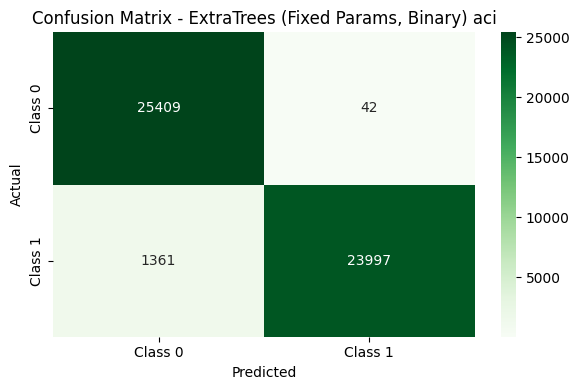

{'Accuracy': 0.9723867818693539, 'Precision': 0.9982528391364034, 'Recall': 0.9463285748087389, 'F1 Score': 0.9715974654331234, 'False Positives': 42, 'Time Taken (s)': 35.6884}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for binary
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train model with fixed hyperparameters
n_estimators = 150
max_depth = 30

start_time = time.time()

model = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
false_positives = cm[0][1]

# Save results
results["ExtraTrees"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_extratrees_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["ExtraTrees"])


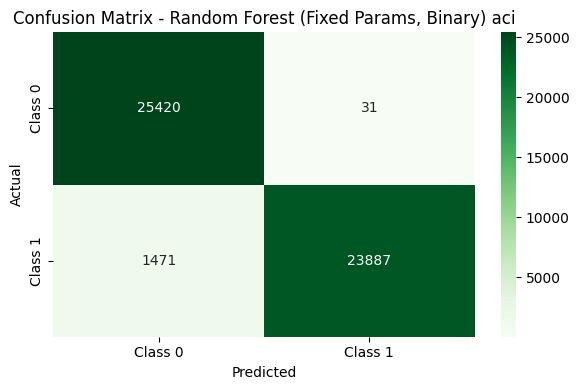

{'Accuracy': 0.9704383081737488, 'Precision': 0.99870390500878, 'Recall': 0.9419906932723401, 'F1 Score': 0.969518629758909, 'False Positives': 31, 'Time Taken (s)': 42.6399}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 75
max_depth = 20

# Timing
start_time = time.time()

# Train model
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')
cm = confusion_matrix(y_test, y_pred_rf)
false_positives = cm[0][1]

# Save results
results["RandomForest"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_rf_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["RandomForest"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


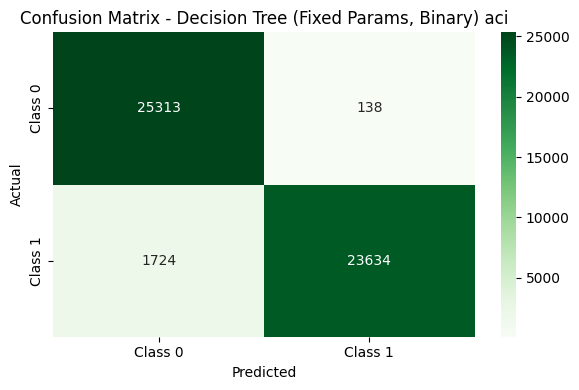

{'Accuracy': 0.9633529492806393, 'Precision': 0.9941948510853105, 'Recall': 0.9320135657386229, 'F1 Score': 0.9621005495623856, 'False Positives': 138, 'Time Taken (s)': 7.6426}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
max_depth = 15
min_samples_split = 2

# Timing
start_time = time.time()

# Train model
model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='binary')
recall = recall_score(y_test, y_pred_dt, average='binary')
f1 = f1_score(y_test, y_pred_dt, average='binary')
cm = confusion_matrix(y_test, y_pred_dt)
false_positives = cm[0][1]

# Save results
results["DecisionTree"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_dt_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/binary_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=36ee29fc229d03f5b9d7ccec720aeb7646ca8c54366c8947a76beb83f8ab3585
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


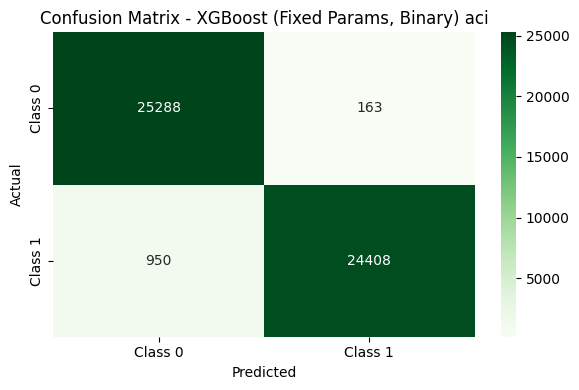

{'Accuracy': 0.9780944320888032, 'Precision': 0.9933661633633145, 'Recall': 0.9625364776401925, 'F1 Score': 0.9777083458511086, 'False Positives': 163, 'Time Taken (s)': 39.1026}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for binary classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 200
max_depth = 15
learning_rate = 0.2

# Timing
start_time = time.time()

# Train model
model = XGBClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
false_positives = cm[0][1]

# Save results
results["XGBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["XGBoost"])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 101664, number of negative: 101571
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.247941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7326
[LightGBM] [Info] Number of data points in the train set: 203235, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500229 -> initscore=0.000915
[LightGBM] [Info] Start training from score 0.000915


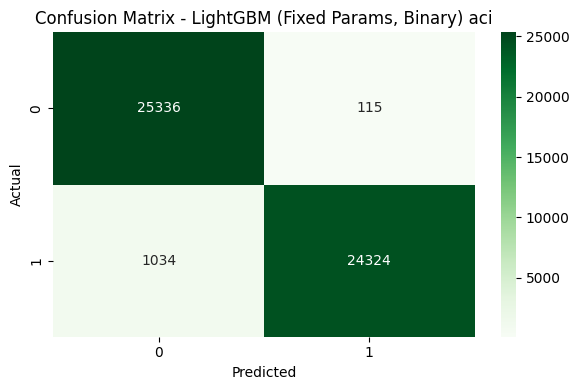

{'Accuracy': 0.9773858961994922, 'Precision': 0.9952944064814436, 'Recall': 0.9592239135578515, 'F1 Score': 0.9769263208627026, 'False Positives': 115, 'Time Taken (s)': 25.5103}


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 200
num_leaves = 60
learning_rate = 0.2

# Timing
start_time = time.time()

# Train model
model = LGBMClassifier(
    n_estimators=n_estimators,
    num_leaves=num_leaves,
    learning_rate=learning_rate,
    objective='binary',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_lgbm = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='binary')
recall = recall_score(y_test, y_pred_lgbm, average='binary')
f1 = f1_score(y_test, y_pred_lgbm, average='binary')
cm = confusion_matrix(y_test, y_pred_lgbm)
false_positives = cm[0][1]

# Save results
results["LightGBM"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_lightgbm_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["LightGBM"])


In [ ]:
!pip install catboost

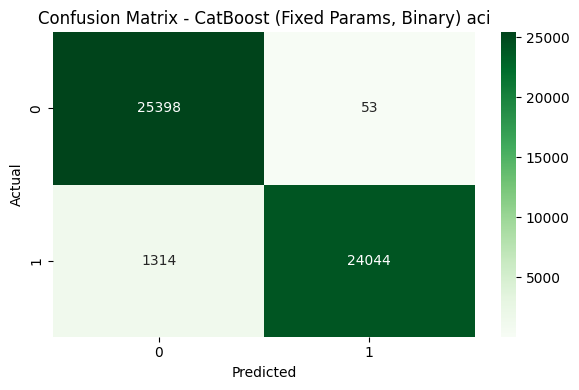

{'Accuracy': 0.9730953177586648, 'Precision': 0.9978005560858199, 'Recall': 0.948182033283382, 'F1 Score': 0.9723587099383277, 'False Positives': 53, 'Time Taken (s)': 42.2886}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
iterations = 200
depth = 8
learning_rate = 0.2

# Timing
start_time = time.time()

# Train model
model = CatBoostClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_cat = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='binary')
recall = recall_score(y_test, y_pred_cat, average='binary')
f1 = f1_score(y_test, y_pred_cat, average='binary')
cm = confusion_matrix(y_test, y_pred_cat)
false_positives = cm[0][1]

# Save results
results["CatBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost (Fixed Params, Binary) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_catboost_fixed_binary_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["CatBoost"])


In [ ]:
print(results)

{'ExtraTrees': {'Accuracy': 0.9723867818693539, 'Precision': 0.9982528391364034, 'Recall': 0.9463285748087389, 'F1 Score': 0.9715974654331234, 'False Positives': 42, 'Time Taken (s)': 35.6884}, 'RandomForest': {'Accuracy': 0.9704383081737488, 'Precision': 0.99870390500878, 'Recall': 0.9419906932723401, 'F1 Score': 0.969518629758909, 'False Positives': 31, 'Time Taken (s)': 42.6399}, 'DecisionTree': {'Accuracy': 0.9633529492806393, 'Precision': 0.9941948510853105, 'Recall': 0.9320135657386229, 'F1 Score': 0.9621005495623856, 'False Positives': 138, 'Time Taken (s)': 7.6426}, 'XGBoost': {'Accuracy': 0.9780944320888032, 'Precision': 0.9933661633633145, 'Recall': 0.9625364776401925, 'F1 Score': 0.9777083458511086, 'False Positives': 163, 'Time Taken (s)': 39.1026}, 'LightGBM': {'Accuracy': 0.9773858961994922, 'Precision': 0.9952944064814436, 'Recall': 0.9592239135578515, 'F1 Score': 0.9769263208627026, 'False Positives': 115, 'Time Taken (s)': 25.5103}, 'CatBoost': {'Accuracy': 0.973095317

# **Comparison**

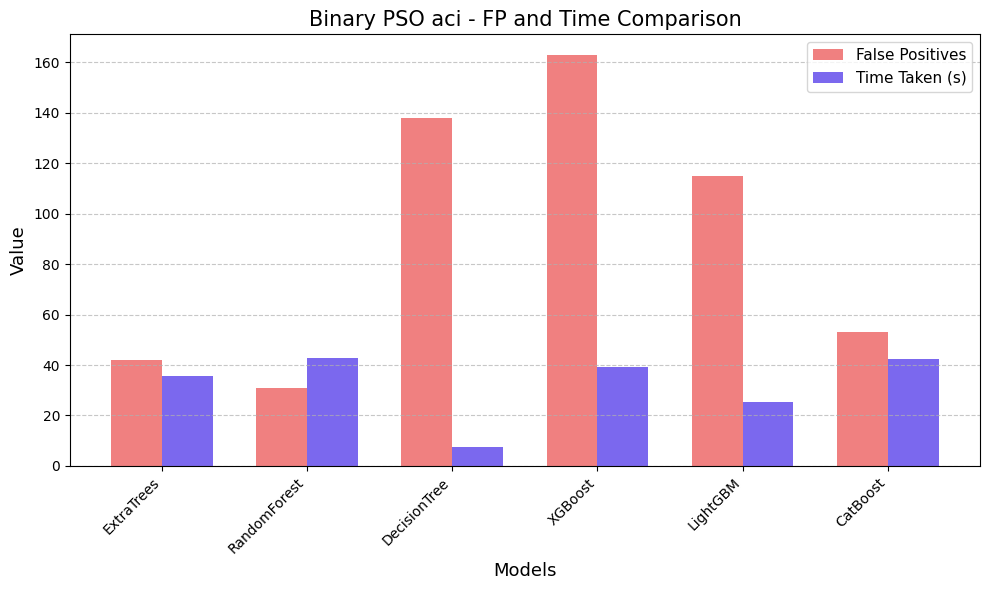

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract models and their metrics
models = list(results.keys())
false_positives = [results[model]["False Positives"] for model in models]
time_taken = [results[model]["Time Taken (s)"] for model in models]


x = np.arange(len(models))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, false_positives, width=width, label='False Positives', color='lightcoral')
plt.bar(x + width/2, time_taken, width=width, label='Time Taken (s)', color='mediumslateblue')


plt.xlabel('Models', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.title('Binary PSO aci - FP and Time Comparison', fontsize=15)
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show
plt.tight_layout()
plt.savefig("binary_pso_aci_fp_time_comparison.png", dpi=800)
plt.show()
